# Importando a base de dados

In [1]:
import pandas as pd

In [2]:
gorjetas = pd.read_csv('dados/tips.csv')

In [3]:
gorjetas.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Traduzindo a base de dados

In [4]:
gorjetas.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [5]:
renomear = {
    'total_bill': 'valor_conta', 
    'tip': 'valor_gorjeta', 
    'dessert': 'sobremesa', 
    'day': 'dia_semana', 
    'time': 'refeicao', 
    'size': 'quantidade_pessoas'
}

In [6]:
gorjetas = gorjetas.rename(columns = renomear)

In [7]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [8]:
sim_nao = {
    'No': 'Não', 
    'Yes': 'Sim'
}

In [9]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [10]:
gorjetas.dia_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [11]:
dias = {
    'Sun': 'Domingo', 
    'Sat': 'Sábado',
    'Thur': 'Quinta-feira',
    'Fri': 'Sexta-feira'
}

In [12]:
gorjetas.dia_semana = gorjetas.dia_semana.map(dias)

In [13]:
gorjetas.refeicao.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [14]:
horas = {
    'Dinner': 'Jantar', 
    'Lunch': 'Almoço'
}

In [15]:
gorjetas.refeicao = gorjetas.refeicao.map(horas)

In [16]:
gorjetas.head()

,valor_conta,valor_gorjeta,sobremesa,dia_semana,refeicao,quantidade_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Importando o Seaborn

In [17]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208 kB 6.8 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [18]:
import seaborn as sns

# Analisando valor da conta e gorjeta

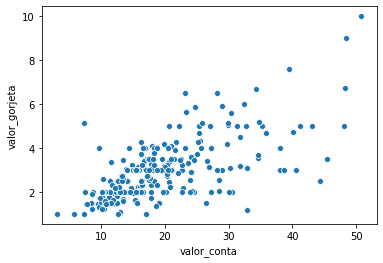

In [19]:
conta_gorjeta = sns.scatterplot(x='valor_conta', y='valor_gorjeta', data=gorjetas)

**Aparentemente, o valor da gorjeta aumenta conforme aumenta o valor da conta.**

In [20]:
print('A base de dados contém {} registros.\n'.format(gorjetas.shape[0]))
print('Registros não nulos:')
gorjetas.count()

A base de dados contém 244 registros.

Registros não nulos:


valor_conta           244
valor_gorjeta         244
sobremesa             244
dia_semana            244
refeicao              244
quantidade_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [21]:
gorjetas['porcentagem'] = (gorjetas['valor_gorjeta']/gorjetas['valor_conta']).round(3)

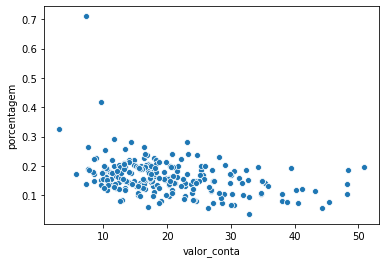

In [22]:
porcentagem_conta = sns.scatterplot(x='valor_conta', y='porcentagem', data=gorjetas)

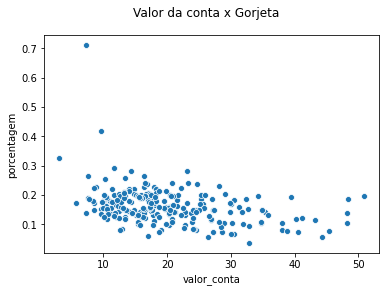

In [23]:
porcentagem_conta.figure.suptitle('Valor da conta x Gorjeta')
porcentagem_conta.get_figure()

**Porém, aqui percebemos que na realidade o valor da conta não é proporcional ao valor da gorjeta, visto que o valor da conta aumenta e a porcentagem dada como gorjeta diminui.**

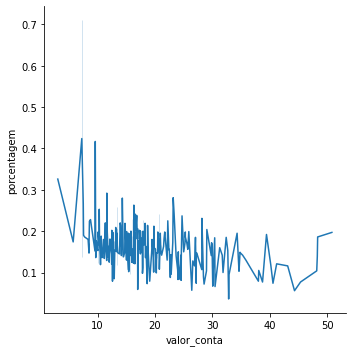

In [24]:
porcentagem_conta_linha = sns.relplot(x='valor_conta', y='porcentagem', kind='line', data=gorjetas)

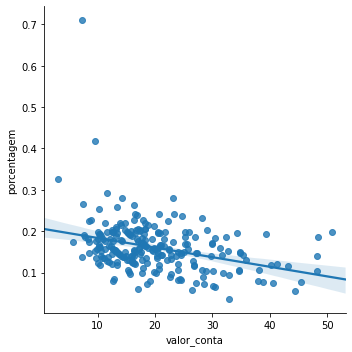

In [25]:
porcentagem_conta_lmplot = sns.lmplot(x='valor_conta', y='porcentagem', data=gorjetas)

**Neste gráfico é mais visível que a porcentagem cedida de gorjeta fica menor a medida que o valor da conta aumenta.**

# Analisando o valor da gorjeta em relação a sobremesa

In [26]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_conta,valor_gorjeta,quantidade_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085093
min,3.070000,1.000000,1.000000,0.036000
25%,13.420000,2.000000,2.000000,0.107000
50%,17.920000,3.000000,2.000000,0.154000
75%,26.860000,3.680000,3.000000,0.195000
max,50.810000,10.000000,5.000000,0.710000


In [27]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_conta,valor_gorjeta,quantidade_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159331
std,8.255582,1.377190,1.017984,0.039949
min,7.250000,1.000000,1.000000,0.057000
25%,13.325000,2.000000,2.000000,0.136500
50%,17.590000,2.740000,2.000000,0.156000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.292000


**Análise Descritiva: A média das gorjetas de clientes que pediram sobremesa não é muito distante da média de gorjetas de cliente que não pediram sobremesa.**

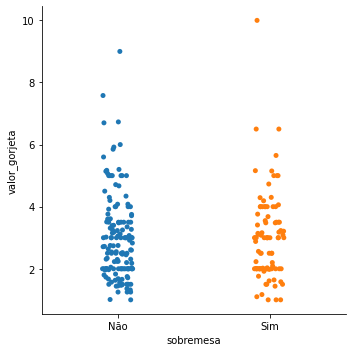

In [28]:
sns.catplot(x='sobremesa', y='valor_gorjeta', data=gorjetas)

**A análise visual acima confirma os valores descritivos das duas últimas tabelas.**

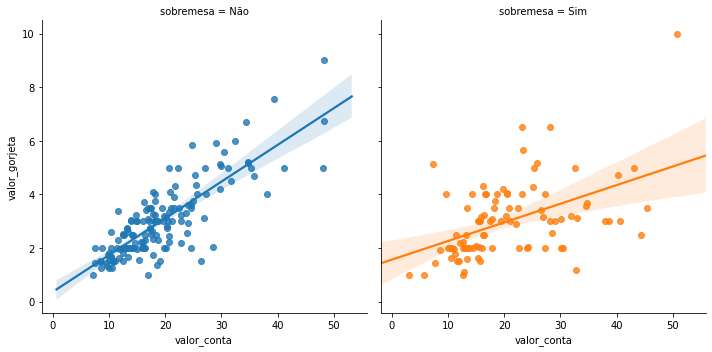

In [29]:
sns.lmplot(x='valor_conta', y='valor_gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

**Entre os que pediram sobremesa, a gorjeta é mais dispersa.**

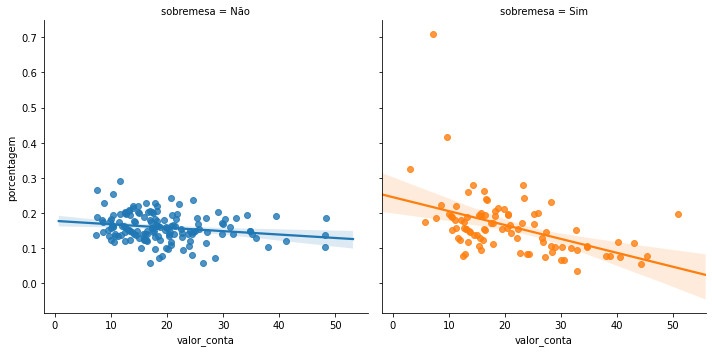

In [30]:
sns.lmplot(x='valor_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas)

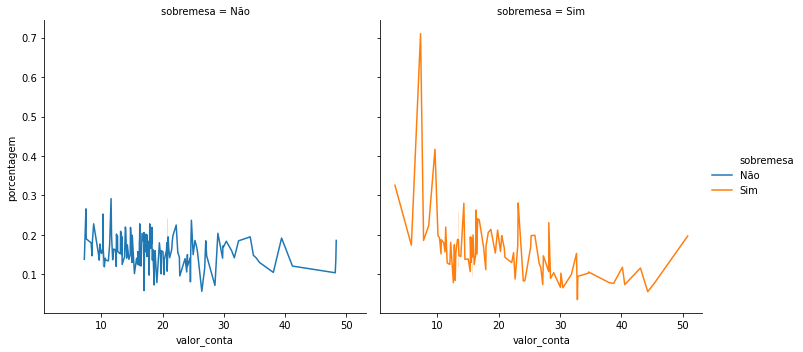

In [31]:
sns.relplot(x='valor_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

**Parece existir uma diferença sutil no valor da gorjeta entre aqueles que pediram ou não sobremesa.**

## Teste de Hipótese - Sobremesa

**H<sup>null</sup>**
>**A distribuição da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**
>**A distribuição da gorjeta não é a mesma nos dois grupos**

In [32]:
from scipy.stats import ranksums

In [33]:
com_sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
com_sobremesa

56     0.079
58     0.157
60     0.158
61     0.145
62     0.180
       ...  
234    0.193
236    0.079
237    0.036
240    0.074
241    0.088
Name: porcentagem, Length: 93, dtype: float64

In [34]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem
sem_sobremesa

0      0.059
1      0.161
2      0.167
3      0.140
4      0.147
       ...  
235    0.124
238    0.130
239    0.204
242    0.098
243    0.160
Name: porcentagem, Length: 151, dtype: float64

In [35]:
r = ranksums(com_sobremesa, sem_sobremesa)

In [36]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5676760764441404


**De acordo com o p-value, apesar dos dois grupos darem gorjetas diferentes entre si, matematicamente falando, essa diferença é insignificante. Sendo assim, continuamos com a primeira hipótese, a hipótese nula, ou seja: a distribuição da taxa da gorjeta é a mesma nos dois grupos.**

**Se os dois grupos dassem gorjetas de formas muito diferentes, o p-value seria igual ou menor a 0.05.**

# Analisando o dia da semana



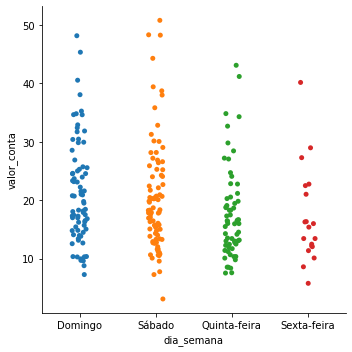

In [37]:
sns.catplot(x='dia_semana', y='valor_conta', data=gorjetas)

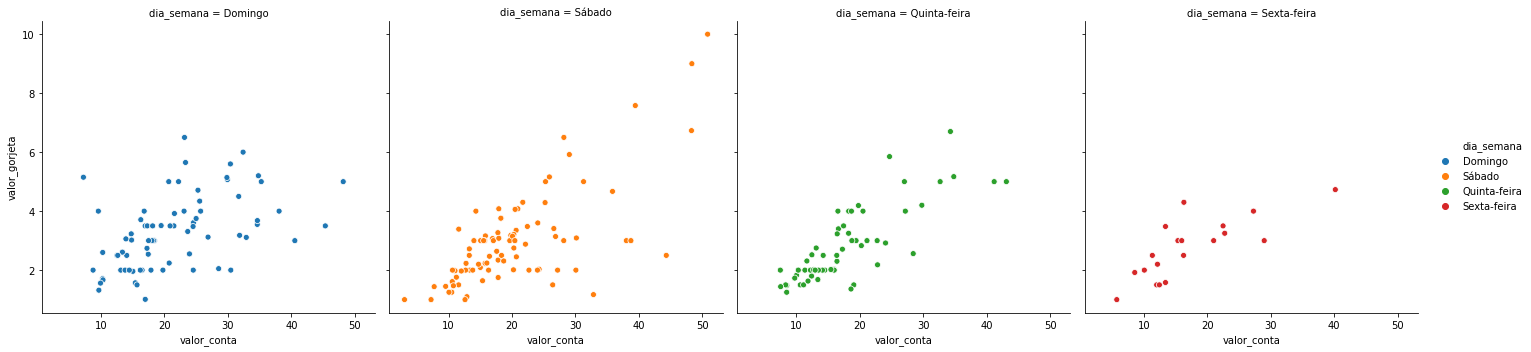

In [38]:
sns.relplot(x='valor_conta', y='valor_gorjeta', hue='dia_semana', col='dia_semana', data=gorjetas)

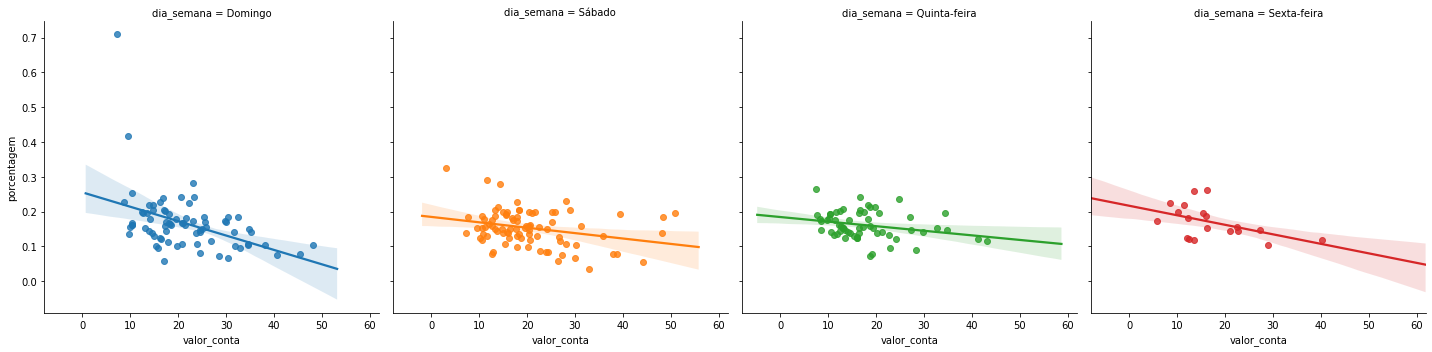

In [39]:
sns.lmplot(x='valor_conta', y='porcentagem', hue='dia_semana', col='dia_semana', data=gorjetas)

In [40]:
media_geral_gorjetas = gorjetas.valor_gorjeta.mean()
print('A média geral das gorjetas é de R${}.'.format(media_geral_gorjetas))

A média geral das gorjetas é de R$2.99827868852459.


In [41]:
gorjetas.groupby(['dia_semana']).mean()[['valor_conta', 'valor_gorjeta', 'porcentagem']]

,valor_conta,valor_gorjeta,porcentagem
dia_semana,,,
Domingo,21.410000,3.255132,0.166921
Quinta-feira,17.682742,2.771452,0.161274
Sexta-feira,17.151579,2.734737,0.170000
Sábado,20.441379,2.993103,0.153149


In [42]:
print('Frequência dos dias:')
gorjetas['dia_semana'].value_counts()

Frequência dos dias:


Sábado          87
Domingo         76
Quinta-feira    62
Sexta-feira     19
Name: dia_semana, dtype: int64

## Teste de Hipótese - Dia da semana

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo.**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no sábado e no domingo.**

In [43]:
valor_conta_domingo = gorjetas.query("dia_semana == 'Domingo'").valor_conta
valor_conta_domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: valor_conta, Length: 76, dtype: float64

In [44]:
valor_conta_sabado = gorjetas.query("dia_semana == 'Sábado'").valor_conta
valor_conta_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_conta, Length: 87, dtype: float64

In [45]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


**A distribuição do valor da conta é igual no sábado e no domingo.**

# Analisando a refeição

In [47]:
gorjetas.refeicao.unique()

array(['Jantar', 'Almoço'], dtype=object)

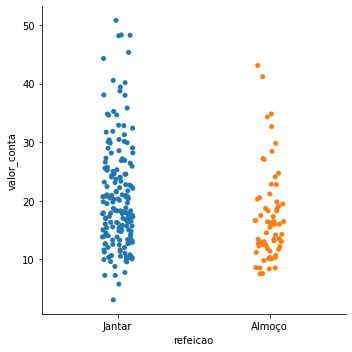

In [48]:
sns.catplot(x='refeicao', y='valor_conta', data=gorjetas)

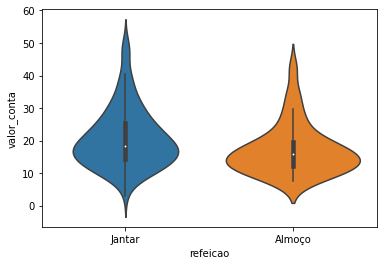

In [49]:
sns.violinplot(x='refeicao', y='valor_conta', data=gorjetas)

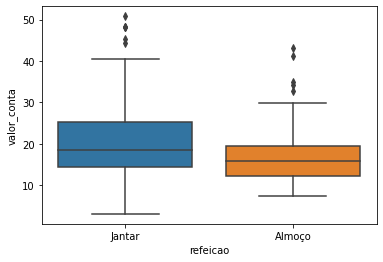

In [50]:
sns.boxplot(x='refeicao', y='valor_conta', data=gorjetas)

In [54]:
almoco = gorjetas.query("refeicao == 'Almoço'").valor_conta
jantar = gorjetas.query("refeicao == 'Jantar'").valor_conta

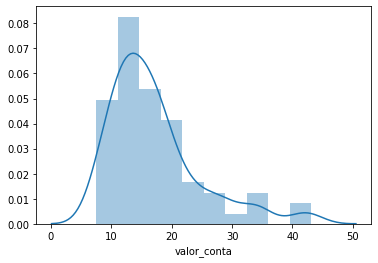

In [53]:
sns.distplot(almoco)

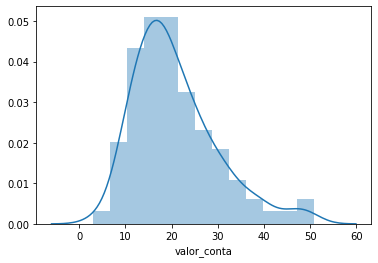

In [55]:
sns.distplot(jantar)

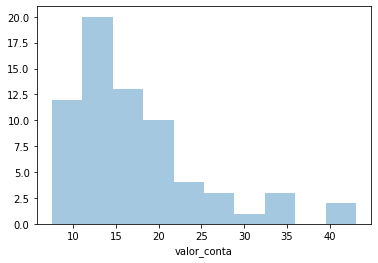

In [56]:
sns.distplot(almoco, kde=False)

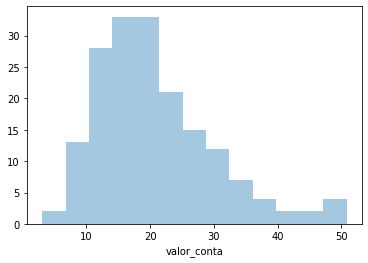

In [57]:
sns.distplot(jantar, kde=False)

In [60]:
gorjetas.groupby(['refeicao']).mean()[['valor_conta', 'valor_gorjeta', 'porcentagem']]

,valor_conta,valor_gorjeta,porcentagem
refeicao,,,
Almoço,17.168676,2.728088,0.164132
Jantar,20.797159,3.102670,0.159534


## Teste de Hipótese - Valor da Conta - Refeição

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no almoço e no jantar.**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no almoço e no jantar.**

In [64]:
r3 = ranksums(almoco, jantar)
print('O valor do p-value é igual a {}.'.format(r3.pvalue))

O valor do p-value é igual a 0.0011791039723641672.


**A distribuição do valor da conta não é igual no almoço e no jantar.**

## Teste de Hipótese - Valor da Gorjeta - Refeição

**H<sup>null</sup>**
>**A distribuição da taxa da gorjeta é igual no almoço e no jantar.**

**H<sup>alt</sup>**
>**A distribuição da taxa da gorjeta não é igual no almoço e no jantar.**

In [67]:
porcentagem_almoco = gorjetas.query("refeicao == 'Almoço'").porcentagem
porcentagem_jantar = gorjetas.query("refeicao == 'Jantar'").porcentagem

In [70]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)
print('O valor do p-value é igual a {}.'.format(r4.pvalue))

O valor do p-value é igual a 0.23027859883366675.


**A distribuição da taxa da gorjeta é igual no almoço e no jantar.**